> #                                      ***Covid_19 Data visualization***

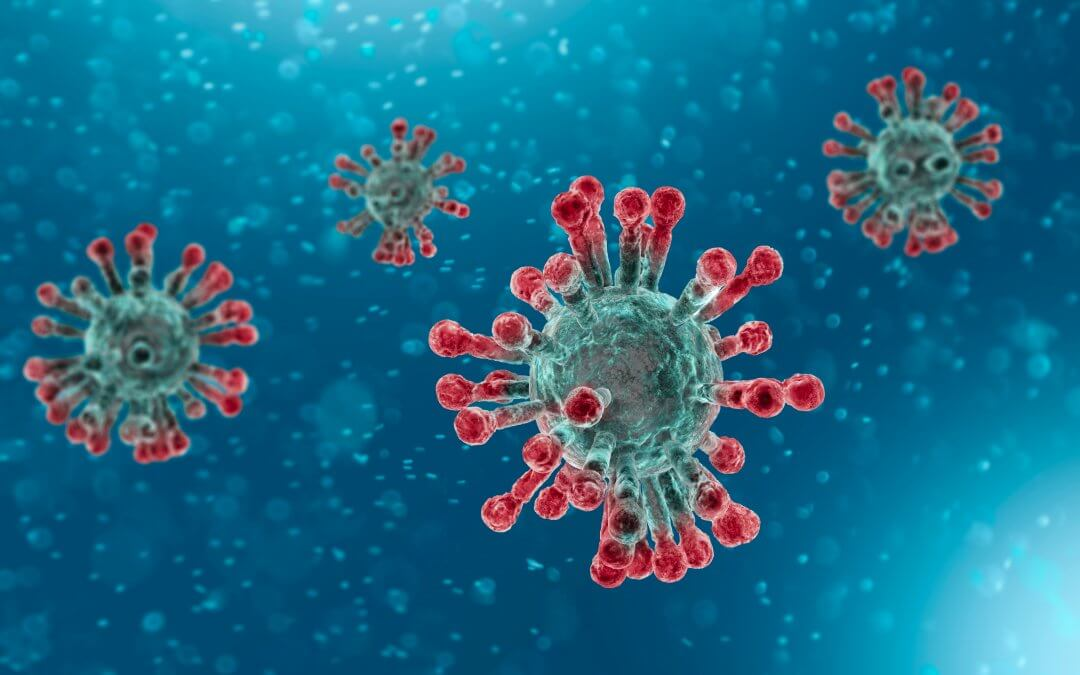

In [1]:
from IPython.display import Image
import os
Image("../input/covid19-pic/covid-19 selfi.jpg")


# **Intoduction:**
### Conronavirus is a type of virus.**COVID-19** is the disease caused by the new coronavirus that was first identified in December 2019.The new coronavirus can be spread from person to person. It is diagnosed with a laboratory test.
## **How does the new coronavirus spread?**
### As of now, researchers know that the new coronavirus is spread through droplets released into the air when an infected person coughs or sneezes. The droplets generally do not travel more than a few feet, and they fall to the ground (or onto surfaces) in a few seconds  this is why physical distancing is effective in preventing the spread.

## **Steps of what we are going to do:**
1. we are going to import some useful libraries for data visualization.
1. We are going to check whether data set have null values or not.
1. we are going to plot many useful graphs which will show very useful information


In [2]:
import pandas as pd # this library is to import data from csv files and  build a structure. Weight =50%
import numpy as np  # this library is use to perform mathmatical operations .weight =5%
import matplotlib.pyplot as plt # for ploting graphs. weight =10%
import seaborn as sns # for ploting graphs
import plotly.express as px # for ploting dynamic graphs. weight =20% 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from matplotlib import style
style.use('ggplot')
import folium # for creating maps weight = 5%
from IPython.display import display_html # for html purpoes .weight =5%


In [3]:
countrywise=pd.read_csv("../input/corona-virus-report/country_wise_latest.csv")
covid19clean = pd.read_csv("../input/corona-virus-report/covid_19_clean_complete.csv")
daywise = pd.read_csv("../input/corona-virus-report/day_wise.csv")
fullgrouped = pd.read_csv("../input/corona-virus-report/full_grouped.csv")
covid19clean.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
# dataframe covid19clean has many null values in Province/State so we are going to drop this column
covid19clean.drop(["Province/State"],axis=1,inplace=True)

#  Bar plot for Confirmed Cases by continents

In [5]:
fig =px.bar(covid19clean,x='Date',y='Confirmed',color ='WHO Region',height =600,
           title = 'Confirmed',color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()

*  South-East-Asia has the most confirmed cases (above 16 million)

#  Line plot for Visualization on Deaths ,Confirmed ,Active

In [6]:
deaths = covid19clean.groupby("Date").sum()["Deaths"].to_frame().reset_index()
confirmed = covid19clean.groupby("Date").sum()["Confirmed"].to_frame().reset_index()
recovered = covid19clean.groupby("Date").sum()["Recovered"].to_frame().reset_index()
active  = covid19clean.groupby("Date").sum()["Active"].to_frame().reset_index()

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed["Date"],y=confirmed["Confirmed"],mode ='lines+markers',name='Confirmed',line =dict(color = "yellow")))
fig.add_trace(go.Scatter(x=recovered["Date"],y=recovered["Recovered"],mode ='lines+markers',name='Recovered',line =dict(color = "Green")))
fig.add_trace(go.Scatter(x=deaths["Date"],y=deaths["Deaths"],mode ='lines+markers',name='Deaths',line =dict(color = "#F5013C")))
fig.add_trace(go.Scatter(x=deaths["Date"],y=active["Active"],mode ='lines+markers',name='Active',line =dict(color = "#189AFF")))

fig.update_layout(title = 'Worldwide Covid-19 Cases:Comparison b/w confirmed ,deaths ,recovered ,active',xaxis_tickfont_size=14,yaxis = dict(title = 'Number of Cases'))

## This line plot shows the following results:
*  There are **Confirmed** cases above *16M* all over the world 
*  There are  *654.036k* **Death** cases all over the world
*  There are *9.4M* **Recovered** cases all over the world
*  There are *6.5M* **Active** cases all over the world

## **Area plot** for Comparison Between New cases,New deaths ,New recovered 

In [8]:
temp=daywise.groupby("Date")[["New cases","New deaths","New recovered"]].sum().reset_index()


In [9]:
fig_nc = px.area(temp,x='Date',y='New cases',color_discrete_sequence=["#DD3294"])
fig_nd = px.area(temp,x='Date',y='New deaths',color_discrete_sequence=["#FF1300"])
fig_nr = px.area(temp,x='Date',y='New recovered',color_discrete_sequence=["#81FF09"])
fig =make_subplots(rows = 2,cols= 2,shared_xaxes=False,horizontal_spacing=0.1,
                  subplot_titles=('New Confirmned ','New Deaths Cases','New Recovered cases'))
fig.add_trace(fig_nc['data'][0],row =1 ,col =1)
fig.add_trace(fig_nd['data'][0],row =1,col=2)
fig.add_trace(fig_nr['data'][0],row =2,col=1)
fig.update_layout(height = 1000)
fig.show()

## These area plots shows following results:
*  New **Confirmed** cases is above ***250k*** all over the world
*  New **Deaths** cases is above ***8k*** all over the world
*  New **Recovered** cases is above ***200k*** all over the world
## Conclusion:
* **Confirmed** cases is increasing day by day and there is no **redemption**

# Wordwide Confirmed Cases and Deaths on **MAP**

In [10]:
temp = covid19clean[covid19clean['Date']==max(covid19clean['Date'])]
m = folium.Map(location=[0,0],tiles='cartodbpositron',min_zoom =1,max_zoom=4,zoom_start=1)
for i in range(0,len(temp)):
    folium.Circle(location=[temp.iloc[i]["Lat"],temp.iloc[i]['Long']],color='crimson',fill='crimson',
                  tooltip='<li><bold>Country:'+str(temp.iloc[i]['Country/Region'])+
                 '<li><bold>WHO Region:'+str(temp.iloc[i]['WHO Region'])+
                 '<li><bold>Confirmed:'+str(temp.iloc[i]['Confirmed'])+
                 '<li><bold>Deaths:'+str(temp.iloc[i]['Deaths']),
       radius= int(temp.iloc[i]['Confirmed'])**0.5).add_to(m)
    
m

*  **World map which shows Confirmed cases and Death cases**

In [11]:
confirmed1=fullgrouped.groupby("Country/Region")["Confirmed"].sum().to_frame().sort_values("Confirmed",ascending=False)
deaths1=fullgrouped.groupby("Country/Region")["Deaths"].sum().to_frame().sort_values("Deaths",ascending=False)
recovered1=fullgrouped.groupby("Country/Region")["Recovered"].sum().to_frame().sort_values("Recovered",ascending=False)
active1=fullgrouped.groupby("Country/Region")["Active"].sum().to_frame().sort_values("Active",ascending=False)

condfirmedgradient=confirmed1.iloc[:15,:].reset_index().style.background_gradient(cmap="prism_r")
deathsgradient=deaths1.iloc[:15,:].reset_index().style.background_gradient(cmap="gist_rainbow_r")
recoveredgradient=recovered1.iloc[:15,:].reset_index().style.background_gradient(cmap="gist_rainbow")
activegradient=active1.iloc[:15,:].reset_index().style.background_gradient(cmap="cool")

In [12]:
stylerconfirmed=condfirmedgradient.set_table_attributes("style='display:inline'").set_caption("Top 15 countries which most confirmed Cases")
stylerdeaths=deathsgradient.set_table_attributes("style='display:inline'").set_caption("Top 15 countries which has most deaths Cases")
styleractive=activegradient.set_table_attributes("style='display:inline'").set_caption("Top 15 countries which has most Active Cases")
stylerrecovered=recoveredgradient.set_table_attributes("style='display:inline'").set_caption("Top 15 countries which has most Recovered Cases")
display_html(stylerconfirmed._repr_html_()+stylerdeaths._repr_html_()+styleractive._repr_html_()+stylerrecovered._repr_html_(), raw=True)

,Country/Region,Confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


In [13]:
daywise

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


# **Bar plot** for Deaths per 100 cases and Recovered per 100 cases

In [14]:
fig_dc = px.bar(daywise,x='Date',y='Deaths / 100 Cases',color_discrete_sequence=["red"])
fig_rc = px.bar(daywise,x='Date',y='Recovered / 100 Cases',color_discrete_sequence=["#0C46CB"])
fig =make_subplots(rows = 1,cols= 2,shared_xaxes=False,horizontal_spacing=0.1,
                  subplot_titles=('Deaths per 100 cases','Recovered per 100 cases'))
fig.add_trace(fig_dc['data'][0],row =1 ,col =1)
fig.add_trace(fig_rc['data'][0],row =1,col=2)
fig.update_layout(height = 480)
fig.show()


## **Scatter plot** for Deaths vs confirmed

In [15]:
fig = px.scatter(covid19clean.sort_values('Deaths',ascending =False).iloc[:15,:],x='Confirmed',y = 'Deaths',color = 'Country/Region',size = 'Confirmed',height = 700 ,
                text = 'Country/Region',log_x =True,log_y = True ,title ='Deaths vs Confirmed Cases(Cases are on log10 scale)')

fig.update_traces(textposition='top center')
fig.update_layout(showlegend =False)
fig.update_layout(xaxis_rangeslider_visible =False)
fig.show()

#### This scatter plot clearly shows that **US** has the most **Death** *(148k)* and **Confirmed** cases *( max:4.3M)*

In [16]:
# we are going to group daywise dataframe by Date for each Recovered ,Deaths and active colums
temp = daywise.groupby('Date')['Recovered','Deaths','Active'].sum().reset_index()
temp =temp.melt(id_vars = 'Date',value_vars =['Recovered','Deaths','Active'],var_name = 'Case',value_name = 'Count')
temp.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Case,Count
0,2020-01-22,Recovered,28
1,2020-01-23,Recovered,30
2,2020-01-24,Recovered,36
3,2020-01-25,Recovered,39
4,2020-01-26,Recovered,52


In [17]:
# we are going to group daywise dataframe by Date for each (new Recovered ,new Deaths and new active colums)
temp_n = daywise.groupby('Date')['New cases','New deaths','New recovered'].sum().reset_index()
temp_n =temp_n.melt(id_vars = 'Date',value_vars =['New cases','New deaths','New recovered'],var_name = 'Case',value_name = 'Count')
temp_n.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Case,Count
0,2020-01-22,New cases,0
1,2020-01-23,New cases,99
2,2020-01-24,New cases,287
3,2020-01-25,New cases,493
4,2020-01-26,New cases,684


## **Area plot** for Count of Cases by Date

In [18]:
fig=px.area(temp,x='Date',y='Count',color='Case',height =600 ,title="Old Cases over time",color_discrete_sequence=["#0C46CB","red","#FFE108"])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## This **Area plot** shows the following results:
* **Active** cases is increasing day by day all over world.Now active case are above *6.358M*.
* **Recovered** cases are also increasing day by day all over world .Now Recovered cases are above *9.468M*
* **Death** cases are also increasing day by day all over world .Now Death cases are above *645.03k*


## **Area plot** for count of new cases by date

In [19]:
fig=px.area(temp_n,x='Date',y='Count',color='Case',height =600 ,title="New Cases over time",color_discrete_sequence=["#0C46CB","red","#FFE108"])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## This **Area plot** shows the following results:
* New **Cases** cases is increasing day by day all over world.Now maximum new case are  *282.76k* in a month.
* New **Recovered** cases are also increasing day by day all over world .Now maximum new Recovered case are  *228.736k* in a month.
* New **Death** cases are also increasing day by day all over world .Now maximum new Death case are  *9.966k* in a month.


## **Area plot** for Deaths per 100 Recovered cases


In [20]:
fig=px.area(daywise,x='Date',y='Deaths / 100 Recovered',height =600 ,title="Deathe per 100 recovered",color_discrete_sequence=["#0C46CB"])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## This **Area plot** shows the following results:
*  Maximum **Deaths/100 recovered** is *134.43M* and it is decreasing.

In [21]:
fig=px.area(countrywise,x='Confirmed',y='Confirmed last week',height =600 ,title="Confirmded cases vs confirmed last week",color_discrete_sequence=["#0C46CB"])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## This **Area plot** shows the following results:
*  **Confirmed** cases are increasing on daily basis.confirmed cases are increased over *4.290M*.
* **Confirmed cases last week** are increasing on daily basis and are increased over *3.83M*.
## Conclusion:
* according this graph **Convid-19** is spreading all over the world 



## **Bar plots** for Confirmed ,number of countries

In [22]:
fig_c = px.bar(daywise ,x ='Date',y='Confirmed',color_discrete_sequence=["#0C46CB"])
fig_d = px.area(daywise , x ='Date',y='No. of countries',color_discrete_sequence=["#0C46CB"])

fig= make_subplots(rows = 1 , cols = 2, shared_xaxes=False,horizontal_spacing=0.1,
                  subplot_titles=('No. of New Cases per Day','No. of Countries'))
fig.add_trace(fig_c['data'][0],row =1, col =1)
fig.add_trace(fig_d['data'][0],row =1, col =2)
fig.show()

## These bar plots shows the following results:
* There *187* **countries** which are facing **COVID-19**.
* Number of New Cases per Day is increasing and Maximum is 16.840M.

In [23]:
covid19clean.head(5)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## **Area plot** for Deaths rate by countries

In [24]:
fig =px.area(covid19clean,x='Date',y='Deaths',color ='Country/Region',height =600,
           title = 'Confirmed',color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()

* **US** has the maximum **Deaths** rate ***146.46k***

In [25]:
fullgrouped.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [26]:
confirmed1n=fullgrouped.groupby("Country/Region")["New cases"].sum().to_frame().sort_values("New cases",ascending=False)
deaths1n=fullgrouped.groupby("Country/Region")["New deaths"].sum().to_frame().sort_values("New deaths",ascending=False)
recovered1n=fullgrouped.groupby("Country/Region")["New recovered"].sum().to_frame().sort_values("New recovered",ascending=False)

condfirmedgradient=confirmed1n.iloc[:15,:].reset_index().style.background_gradient(cmap="jet_r")
deathsgradient=deaths1n.iloc[:15,:].reset_index().style.background_gradient(cmap="cool")
recoveredgradient=recovered1n.iloc[:15,:].reset_index().style.background_gradient(cmap="prism")

In [27]:
stylerconfirmed=condfirmedgradient.set_table_attributes("style='display:inline'").set_caption("Top 15 countries which has most mew confirmed Cases")
stylerdeaths=deathsgradient.set_table_attributes("style='display:inline'").set_caption("Top 15 countries which has most new deaths Cases")
stylerrecovered=recoveredgradient.set_table_attributes("style='display:inline'").set_caption("Top 15 countries which has most Recovered Cases")

display_html(stylerconfirmed._repr_html_()+stylerdeaths._repr_html_()+stylerrecovered._repr_html_(), raw=True)

,Country/Region,New cases
0,US,4290258
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606
